**Implementation with Email Spam Detection Dataset**

Dataset Overview
The dataset is access  on Kaggle repositories. A popular one is:  Email Spam Classification Dataset

- Contains attributes such as text, label, etc.


- Typically, the label column marks whether the email is "spam" or "ham".



**Dataset Description:  Email Spam Detection**

This dataset is a curated collection of  email messages, consisting of both ham (legitimate) and spam (unwanted or malicious) emails. The dataset is specifically designed to support the development and evaluation of spam filtering models using machine learning techniques.

**Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    65 non-null     object
 1   label   65 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None
label
ham     40
spam    25
Name: count, dtype: int64


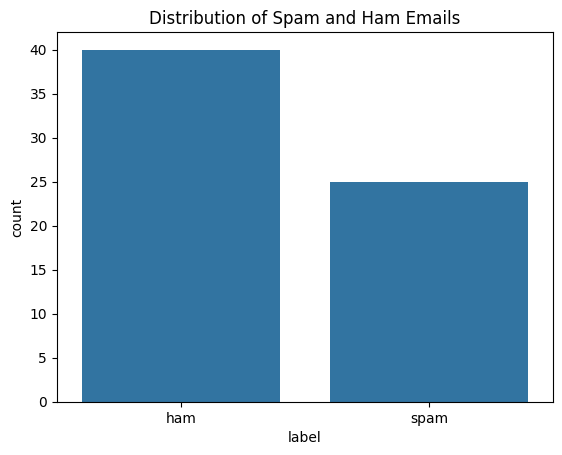

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("/content/email_spam.csv")

# Check basic structure
print(df.info())
print(df['label'].value_counts())

# Plot class distribution
sns.countplot(x='label', data=df)
plt.title("Distribution of Spam and Ham Emails")
plt.show()




The dataset is not perfectly balanced, but the ratio of 40:25 (ham:spam) is reasonably close for training models without heavily skewed bias. Since ham is more frequent, some models , especially linear ones might favor predicting ham more often unless proper preprocessing or weighting is applied.

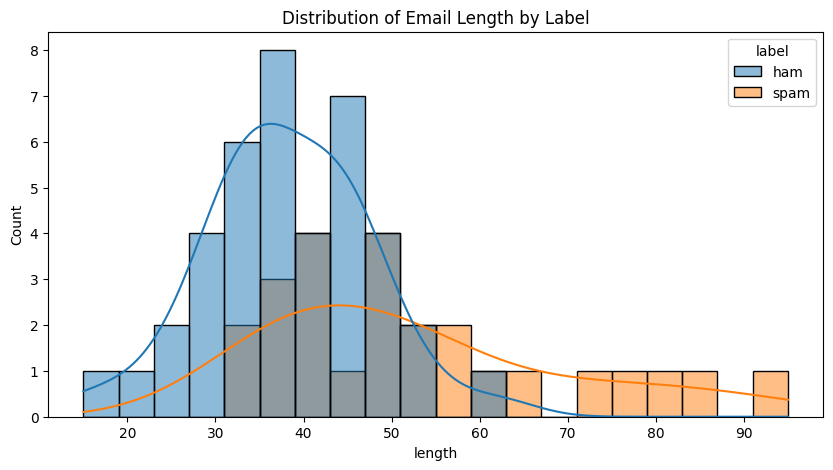

In [2]:
# Add a column for message length
df['length'] = df['text'].apply(len)

# Plot histogram of text lengths
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='length', hue='label', bins=20, kde=True)
plt.title("Distribution of Email Length by Label")
plt.show()


- Email length is a strong discriminative feature.

- Ham messages are generally shorter and consistent.

- Spam messages tend to be longer and more varied.

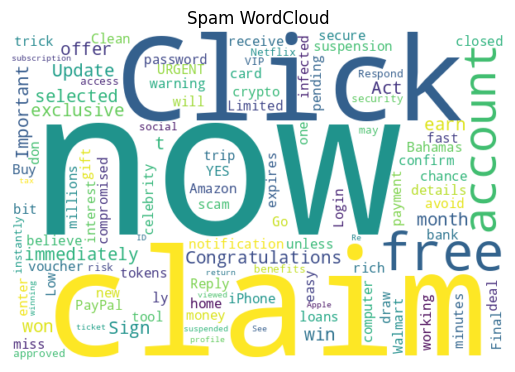

In [3]:
# WordCloud for spam messages
spam_words = ' '.join(df[df['label'] == 'spam']['text'])
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Spam WordCloud")
plt.show()


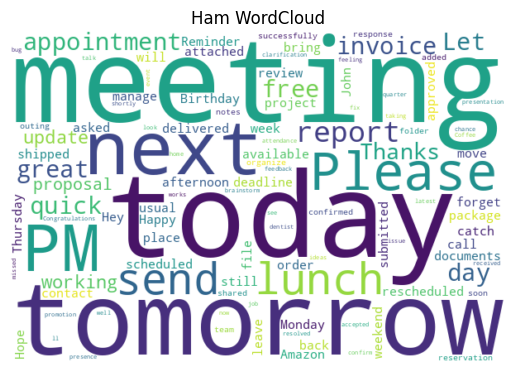

In [4]:
# WordCloud for ham messages
ham_words = ' '.join(df[df['label'] == 'ham']['text'])
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Ham WordCloud")
plt.show()

**Preprocessing**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/email_spam.csv")  # Update with actual file path
df = df[['text', 'label']]  # Ensure dataset has the correct columns
df.columns = ['message', 'label']

# Map labels ('spam' -> 1, 'ham' -> 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Vectorize text using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


**Model 1: Logistic Regression**

- Logistic Regression is suitable for binary classification tasks, such as distinguishing between spam and ham emails.

In [6]:
log_model = LogisticRegression()
log_model.fit(X_train_vec, y_train)
log_preds = log_model.predict(X_test_vec)

# Evaluate the model
print("Logistic Regression Results")
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))
print("Accuracy:", accuracy_score(y_test, log_preds))


Logistic Regression Results
[[7 0]
 [6 0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       0.00      0.00      0.00         6

    accuracy                           0.54        13
   macro avg       0.27      0.50      0.35        13
weighted avg       0.29      0.54      0.38        13

Accuracy: 0.5384615384615384


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Model 2: Linear Regression (for classification)**

- Linear Regression is typically used for regression tasks but can also be adapted for classification tasks with a threshold.

In [7]:
lin_model = LinearRegression()
lin_model.fit(X_train_vec, y_train)
lin_preds_prob = lin_model.predict(X_test_vec)
lin_preds = [1 if prob > 0.5 else 0 for prob in lin_preds_prob]

# Evaluate the model
print("Linear Regression Results")
print(confusion_matrix(y_test, lin_preds))
print(classification_report(y_test, lin_preds))
print("Accuracy:", accuracy_score(y_test, lin_preds))


Linear Regression Results
[[5 2]
 [2 4]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.67      0.67      0.67         6

    accuracy                           0.69        13
   macro avg       0.69      0.69      0.69        13
weighted avg       0.69      0.69      0.69        13

Accuracy: 0.6923076923076923


 **Unit Testing**

- Testing ensures your models are running correctly. Here’s an example using unittest to test the shape and prediction length:

In [8]:
import unittest

class TestSpamModels(unittest.TestCase):
    def test_vector_shape(self):
        self.assertEqual(X_train_vec.shape[0], y_train.shape[0])

    def test_prediction_length(self):
        self.assertEqual(len(log_preds), len(y_test))

unittest.main(argv=[''], exit=False)


..
----------------------------------------------------------------------
Ran 2 tests in 0.009s

OK


**Visualizing Results**

-  visualizing the confusion matrix to better understand model performance:

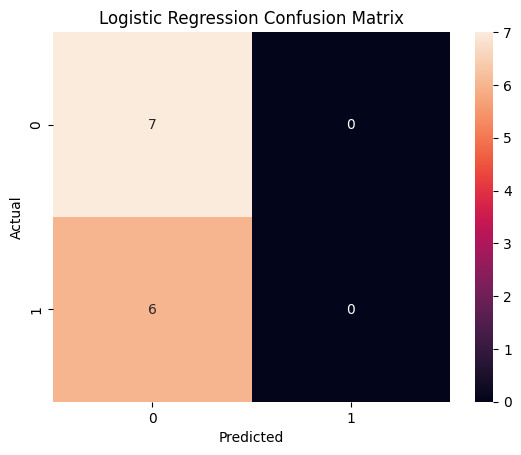

In [9]:
# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



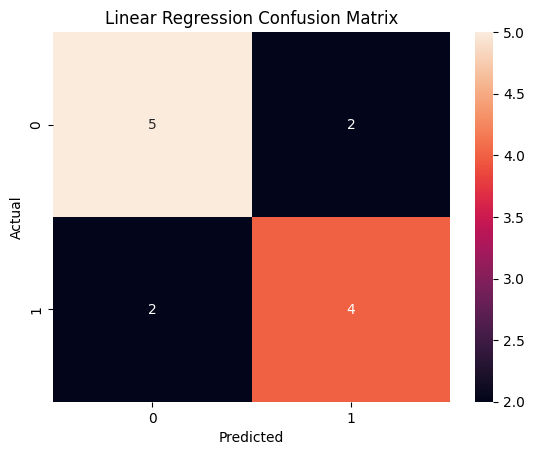

In [10]:
# Confusion Matrix for Linear Regression
sns.heatmap(confusion_matrix(y_test, lin_preds), annot=True, fmt='d')
plt.title("Linear Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()